In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
import random
import torch
from torch import nn
import torch.optim as optim


In [ ]:
# timestep = 600
# sequence_length = 100

In [ ]:
def sinusoidal(sequence_length):
  t = np.arange(sequence_length)
  amplitude = 1
  frequency = 0.1
  mean_drift = 0.01
  c = 0
  noise_factor = 0.1
  noise = noise_factor * np.random.randn(sequence_length)
  input_data = amplitude * np.sin(frequency * (t + c)) + mean_drift*t + noise
  return input_data


# num_examples = 10

# datasets = sinusoidal(num_examples)
# plt.plot(t, input_data)
# plt.show()

In [ ]:
class PredictiveCodingRNN(nn.Module):

    def __init__(self, input_size, output_size, hidden_size):
      super(PredictiveCodingRNN, self).__init__()
      self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
      self.linear = nn.Linear(hidden_size, output_size)
      self.prediction = nn.Linear(input_size, hidden_size)

    def forward(self, inputs):
        out, _ = self.rnn(inputs)
        predictions = self.prediction(out)
        outputs = self.linear(out)
        return outputs, predictions


In [ ]:
# Training process

def train(model, criterion, optimizer, train_inputs, train_targets, epochs):
  for epoch in range(epochs):
    optimizer.zero_grad()
    outputs, predictions = model(train_inputs)
    prediction_error = train_targets - predictions

    loss = criterion(predictions, train_targets)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
def evaluation(model, test_inputs):
  model.eval()
  with torch.no_grad():
        _, predictions = model(test_inputs)
  return predictions.numpy()

In [ ]:
# Hyperparameters
input_size = 1
hidden_size = 64
output_size = 1
sequence_length = 100
num_epochs = 1000
learning_rate = 0.001

# Create Predictive Coding RNN
model = PredictiveCodingRNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
train_dataset = sinusoidal(sequence_length)
test_dataset = sinusoidal(sequence_length) # Generate synthetic test data

# train_size = int(0.8*timestep)
# train_dataset, test_dataset = input_data[:train_size], input_size[train_size:]

# train_size = int(0.8*sequence_length)
# train_dataset = input_data[:train_size]
# test_dataset = input_data[train_size:]


# Convert train data to PyTorch tensor
train_inputs = torch.tensor(train_dataset[:-1], dtype=torch.float32).view(1, -1, 1)
train_targets = torch.tensor(train_dataset[1:], dtype=torch.float32).view(1, -1, 1)

# Convert test data to PyTorch tensor
test_inputs = torch.tensor(test_dataset[:-1], dtype=torch.float32).view(1, -1, 1)

In [ ]:
train(model, criterion, optimizer, train_inputs, train_targets, num_epochs)

predictive_results = evaluation(model, test_inputs)

Epoch [1/1000], Loss: 1.7200
Epoch [101/1000], Loss: 0.9941
Epoch [201/1000], Loss: 0.5880
Epoch [301/1000], Loss: 0.3712
Epoch [401/1000], Loss: 0.2572
Epoch [501/1000], Loss: 0.1962
Epoch [601/1000], Loss: 0.1617
Epoch [701/1000], Loss: 0.1404
Epoch [801/1000], Loss: 0.1257
Epoch [901/1000], Loss: 0.1146


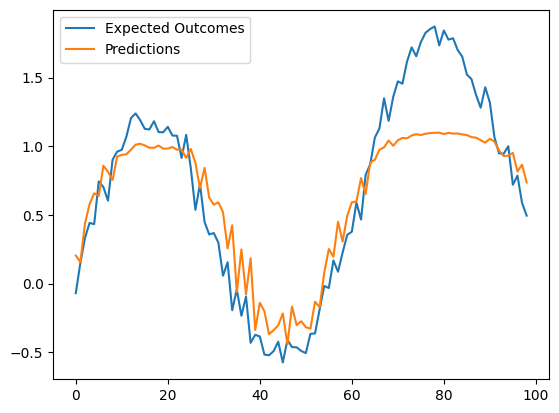

In [ ]:
plt.plot(test_dataset[1:], label='Expected Outcomes')
plt.plot(predictive_results[0], label='Predictions')
plt.legend()
plt.show()
